In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wOd0mBW9BBQQJ-JsVWJwLfI4WetFPyNECdiqPYNbXhAL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'placement-donotdelete-pr-g48cvau9n3pzzl'
object_key = 'PlacementData.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()



,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [5]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


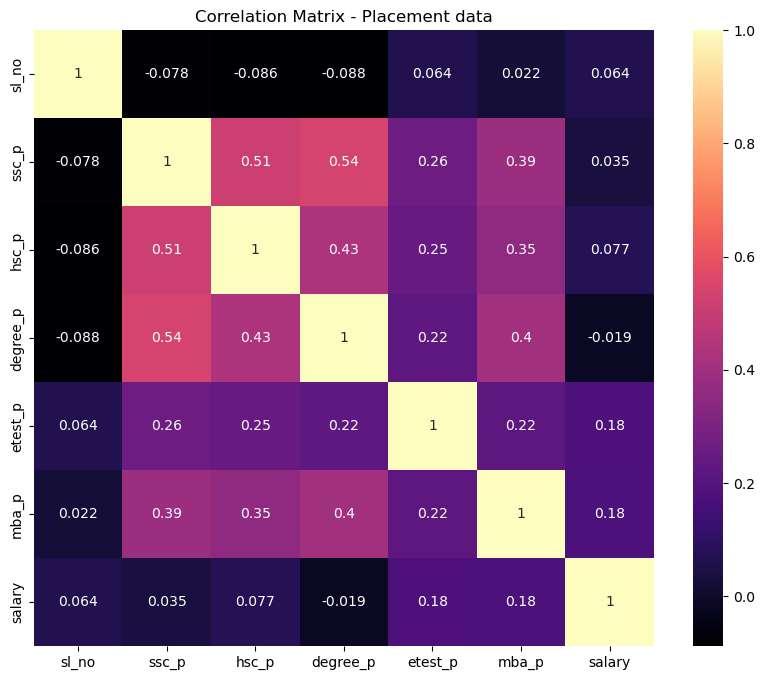

In [7]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix - Placement data')
plt.show()

In [8]:
data = data.drop(columns=['sl_no'])
data = data.drop(columns=['salary'])

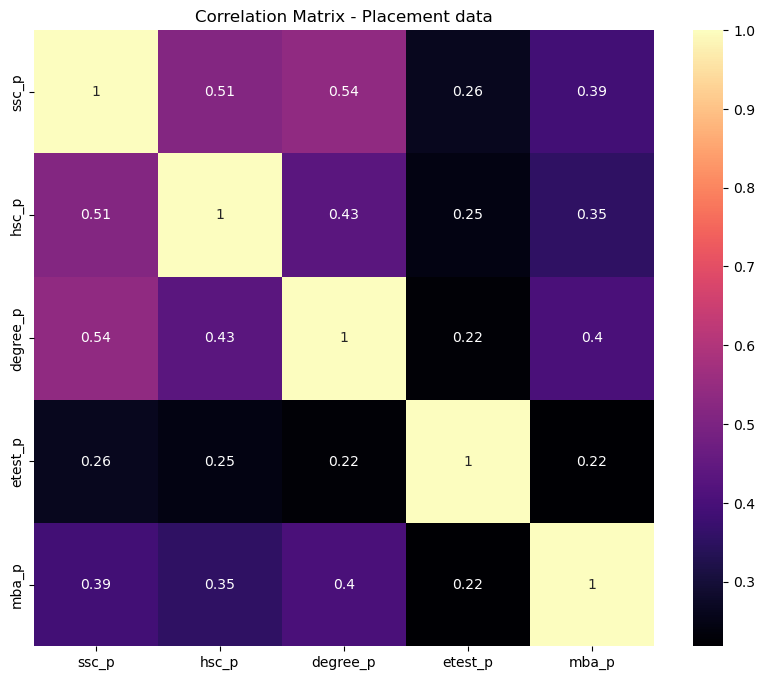

In [9]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix - Placement data')
plt.show()

In [10]:
data.shape

(215, 13)

In [11]:
data.size

2795

In [12]:
data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [15]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


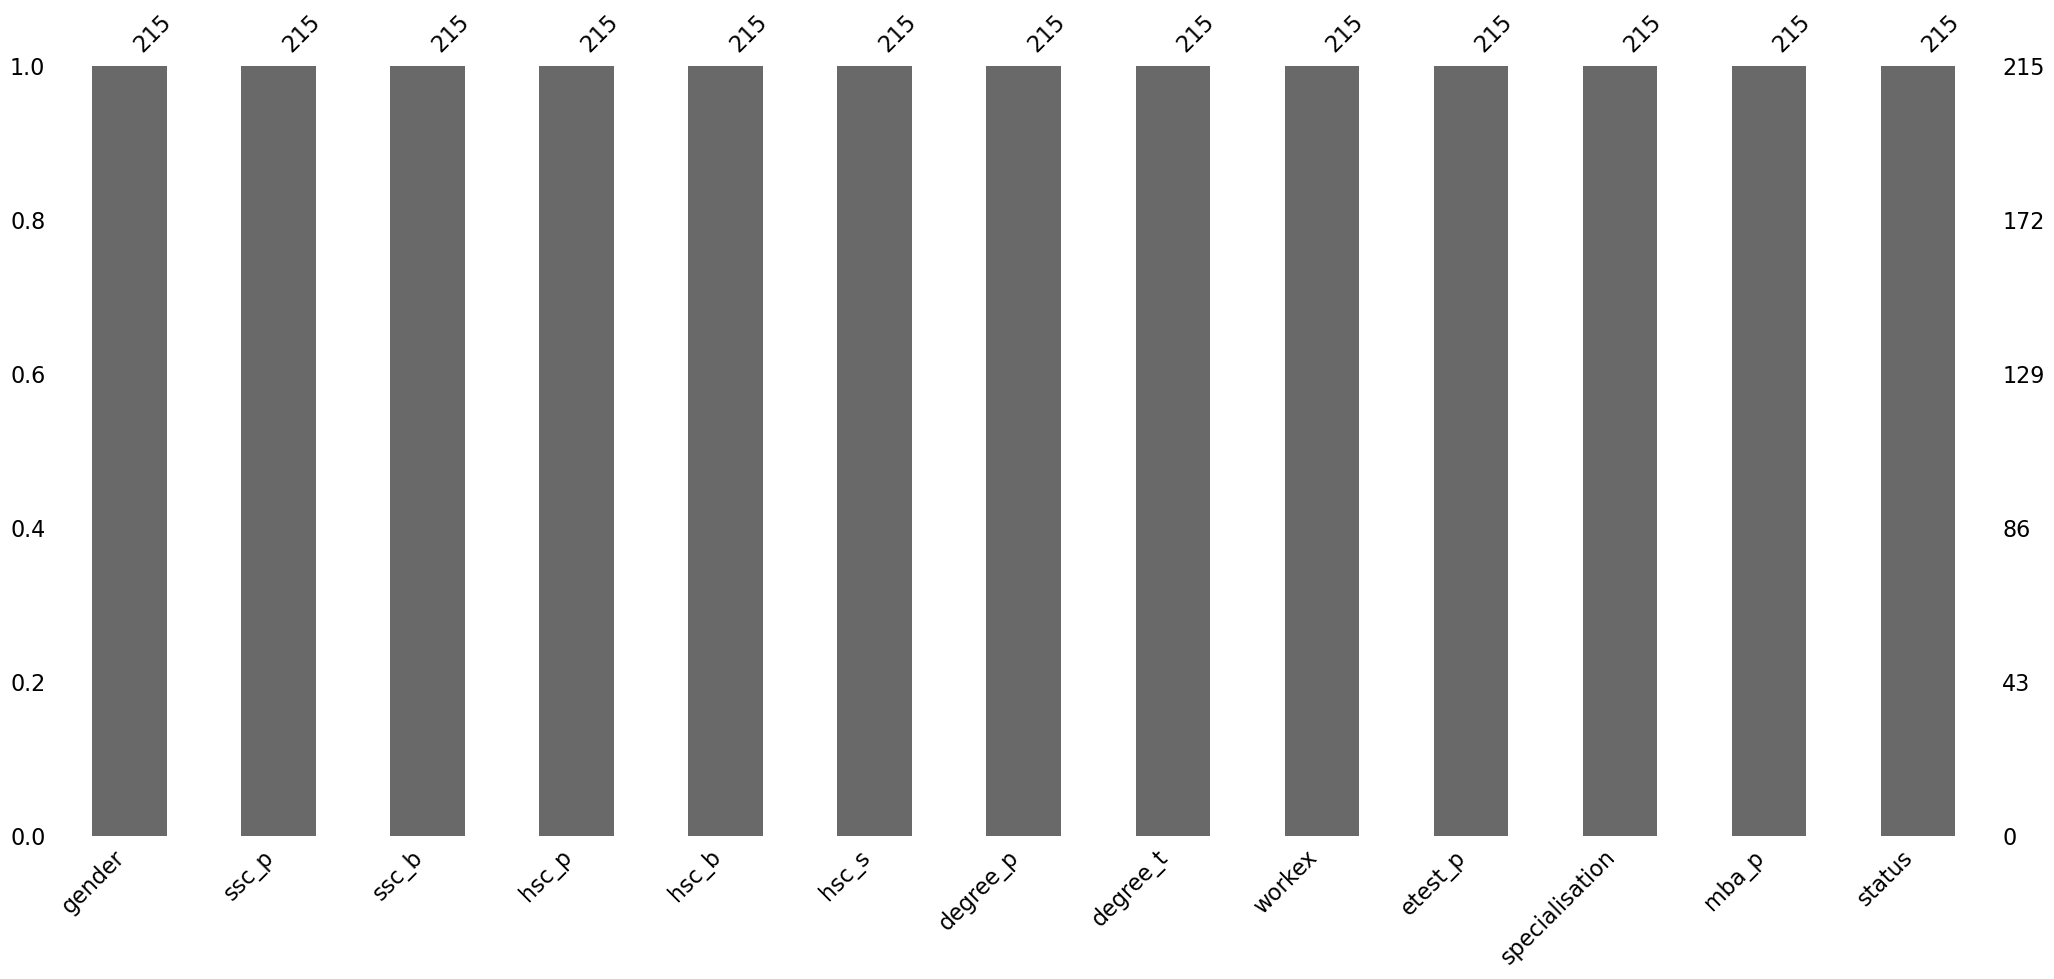

In [16]:
import missingno as msno
p = msno.bar(data)

In [17]:
data[data.duplicated()==True]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status


In [18]:
data["status"].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [19]:
data.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

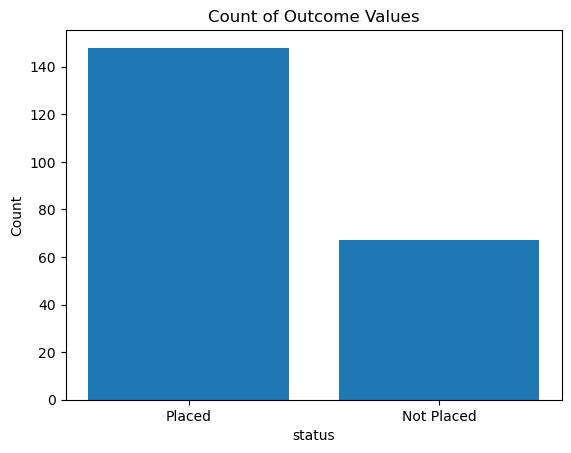

In [20]:
outcome_counts = data['status'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values)
plt.title('Count of Outcome Values')
plt.xlabel('status')
plt.ylabel('Count')
plt.show()

In [21]:
from sklearn import preprocessing

In [22]:
data['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [23]:
data['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [24]:
data['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [25]:
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [26]:
data['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [27]:
data['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
le = preprocessing.LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ssc_b'] = le.fit_transform(data['ssc_b'])
data['hsc_b'] = le.fit_transform(data['hsc_b'])
data['hsc_s'] = le.fit_transform(data['hsc_b'])
data['degree_t'] = le.fit_transform(data['degree_t'])
data['workex'] = le.fit_transform(data['workex'])
data['specialisation'] = le.fit_transform(data['specialisation'])
data['status'] = le.fit_transform(data['status'])

In [29]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,1,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,0,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,0,73.30,0,0,96.8,0,55.50,1


In [30]:
data.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,0.609302,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,0.688372
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.489045,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,0.464240
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,0.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,1.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,1.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000


In [31]:
x = data.drop(columns=['status'])
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,1,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,0,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,0,73.30,0,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
211,1,58.00,1,60.00,1,1,72.00,2,0,74.0,0,53.62
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23


In [32]:
y = data['status']
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [34]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 25.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(x,y)
y_df = pd.Series(y)
x_df = pd.DataFrame(x)
print(y_df.value_counts())
print(x_df.value_counts())

1    148
0    148
Name: status, dtype: int64
gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  etest_p  specialisation  mba_p
0       40.89  1      45.83  1      1      53.00     0         0       71.2     1               65.49    1
1       62.00  0      65.00  1      1      60.00     0         0       84.0     0               64.15    1
                      63.00  1      1      66.00     0         0       85.0     1               55.14    1
                      60.33  1      1      64.21     2         0       63.0     1               60.02    1
                      58.00  1      1      53.00     0         0       89.0     1               60.22    1
                                                                                                        ..
0       74.00  1      73.00  1      1      73.00     0         1       80.0     0               67.69    1
                      66.00  1      1      58.00     0         0       70.0     1               60.23   

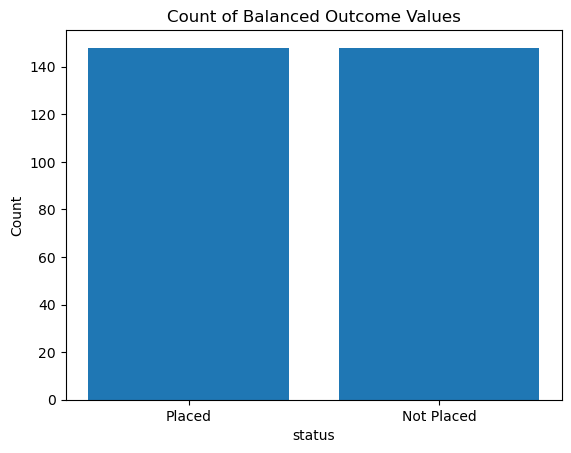

In [36]:
import matplotlib.pyplot as plt

balanced_data = pd.DataFrame({'status': y})
balanced_counts = balanced_data['status'].value_counts()
plt.bar(balanced_counts.index, balanced_counts.values)
plt.title('Count of Balanced Outcome Values')
plt.xlabel('status')
plt.ylabel('Count')
plt.xticks(balanced_counts.index, ['Not Placed', 'Placed'])  # Set the x-axis labels
plt.show()

In [37]:
skew = data.skew()
print('Skew of attribute distributions in the data:\n')
print(skew)

Skew of attribute distributions in the data:

gender           -0.617267
ssc_p            -0.132649
ssc_b             0.159753
hsc_p             0.163639
hsc_b            -0.451200
hsc_s            -0.451200
degree_p          0.244917
degree_t          0.877658
workex            0.660535
etest_p           0.282308
specialisation    0.235795
mba_p             0.313576
status           -0.819150
dtype: float64


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=30)

In [38]:
X_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
61,1,84.200000,0,73.400000,0,0,66.890000,0,0,61.600000,0,62.480000
279,0,72.186208,0,62.739200,0,0,65.362758,0,0,68.627584,1,69.117918
286,1,61.129595,0,67.652804,0,0,60.608801,0,0,56.347196,0,56.000722
60,1,74.000000,0,70.000000,0,0,72.000000,0,1,60.000000,0,57.240000
78,1,84.000000,1,90.900000,1,1,64.500000,2,0,86.040000,0,59.420000
...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,74.900000,1,57.000000,1,1,62.000000,1,1,80.000000,0,60.780000
145,1,89.400000,1,65.660000,1,1,71.250000,2,0,72.000000,1,63.230000
251,0,52.000000,0,50.535661,1,1,56.464339,1,0,64.559435,1,59.939904
140,1,65.000000,0,64.800000,1,1,69.500000,0,1,56.000000,0,56.940000


In [39]:
X_test

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
53,1,80.000000,1,70.000000,1,1,72.000000,2,0,87.000000,1,71.040000
64,1,80.000000,1,73.000000,1,1,75.000000,0,0,61.000000,0,58.780000
97,0,70.500000,0,62.500000,1,1,61.000000,0,0,93.910000,0,69.030000
289,0,70.402513,0,62.493501,1,1,61.051993,0,0,93.826681,0,68.921595
198,0,67.000000,0,70.000000,0,0,65.000000,1,0,88.000000,1,71.960000
215,1,60.319884,0,63.340058,1,1,60.309797,2,0,85.824927,1,57.078544
226,1,61.977589,1,50.975640,1,1,52.048720,1,0,68.502361,0,62.841131
183,1,65.000000,0,77.000000,0,0,69.000000,0,0,60.000000,1,61.820000
201,1,54.200000,0,63.000000,1,1,58.000000,0,0,79.000000,1,58.440000
1,1,79.330000,0,78.330000,1,1,77.480000,2,1,86.500000,0,66.280000


In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9
Precision: 0.9
Recall: 0.9473684210526315
F1 Score: 0.9230769230769231
ROC AUC Score: 0.8827751196172248


In [42]:
pred = dtc.predict([[1	,80.000000,	1,	70.000000,	1,	1,	72.000000,	2,	0,	87.000000,	1,	71.040000]])
pred

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## Deployment in IBM Cloud

In [44]:
!pip install -U ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.316
    Uninstalling ibm-watson-machine-learning-1.0.316:
      Successfully uninstalled ibm-watson-machine-learning-1.0.316


In [45]:
from ibm_watson_machine_learning import APIClient

## Authenticate and set space

In [46]:
wml_credentials={
    "apikey":"y4L1Z37QDgTZex4svMbmqUh9KHksM84TAoWkcKbCnj9x",
    "url":"https://us-south.ml.cloud.ibm.com"   
}

In [47]:
wml_client=APIClient(wml_credentials)

In [48]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------  ------------------------
ID                                    NAME                  CREATED
e5c89db8-83b6-4ef5-8902-7ff2ce47c9b9  placement             2023-09-03T12:52:59.220Z
e9187bfd-3354-45ff-80db-bebcc6ee7d73  Placement_Prediction  2023-08-30T17:37:35.432Z
------------------------------------  --------------------  ------------------------


,ID,NAME,CREATED
0,e5c89db8-83b6-4ef5-8902-7ff2ce47c9b9,placement,2023-09-03T12:52:59.220Z
1,e9187bfd-3354-45ff-80db-bebcc6ee7d73,Placement_Prediction,2023-08-30T17:37:35.432Z


In [49]:
SPACE_ID="e5c89db8-83b6-4ef5-8902-7ff2ce47c9b9"

In [50]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [51]:
wml_client.software_specifications.list(100)

-----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                           ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10        01ce9391-1a79-5a33-94fb-2e134337f314  base  not_provided
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10       079a91e0-245f-5269-8926-3c20b28f37dc  base  not_provided
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base  unsupported         pytorch

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,not_provided,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,not_provided,
...,...,...,...,...,...
95,autoai-kb_3.0-py3.6,d139f196-e04b-5d8b-9140-9a10ca1fa91a,base,unsupported,autoai-kb_rt22.2-py3.10
96,spark-mllib_3.0-py36,d82546d5-dd78-5fbb-9131-2ec309bc56ed,base,unsupported,spark-mllib_3.3
97,autoai-kb_3.4-py3.8,da9b39c3-758c-5a4f-9cfd-457dd4d8c395,base,unsupported,autoai-kb_rt22.2-py3.10
98,kernel-spark3.2-r3.6,db2fe4d6-d641-5d05-9972-73c654c60e0a,base,not_provided,


## save and deploy the model

In [52]:
MODEL_NAME="placement"
DEPLOYMENT_NAME="placement"
DEMO_MODEL=dtc

In [53]:
# set python version
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [54]:
import sklearn
sklearn.__version__

'1.1.1'

In [57]:
# setup model meta
model_props={
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID :software_spec_uid
}

In [58]:
# save model
model_details=wml_client.repository.store_model(
model=DEMO_MODEL,
meta_props=model_props,
training_data=X_train,
training_target=y_train)

In [59]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'status',
  'schemas': {'input': [{'fields': [{'name': 'gender', 'type': 'int64'},
      {'name': 'ssc_p', 'type': 'float64'},
      {'name': 'ssc_b', 'type': 'int64'},
      {'name': 'hsc_p', 'type': 'float64'},
      {'name': 'hsc_b', 'type': 'int64'},
      {'name': 'hsc_s', 'type': 'int64'},
      {'name': 'degree_p', 'type': 'float64'},
      {'name': 'degree_t', 'type': 'int64'},
      {'name': 'workex', 'type': 'int64'},
      {'name': 'etest_p', 'type': 'float64'},
      {'name': 'specialisation', 'type': 'int64'},
      {'name': 'mba_p', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
   'name': 'runtime-22.2-py3.10'},
  'training_data_references': [{'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'gender', 'type': 'int64'},
      {'name': 'ssc_p', 'type': 'float64'},
      {'name': 'ssc_b', 'typ

In [60]:
model_id=wml_client.repository.get_model_id(model_details)

In [61]:
model_id

'2664ded6-44cb-402a-af31-1c6ebda79d45'

In [63]:
# set meta
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
    
}

In [64]:
# deploy
deployment=wml_client.deployments.create(
artifact_uid=model_id,
meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: '2664ded6-44cb-402a-af31-1c6ebda79d45' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='a18437a4-857c-4507-a6f0-6230446daff6'
------------------------------------------------------------------------------------------------


